# Note de cours
## Introduction
Soit un gaz réel qui est décrit par la relations d'état
$$\left( p + \frac{a}{v^2}\right) \left( v - b \right) = RT, n = 1$$
connaissant $p, T, a, b$, que vaut le volume occupée
$$\begin{aligned}
    &P(v-b) + \frac{a}{v^{2}}(v-b) = RT\\
    \implies&P= \frac{RT}{v-b} - \frac{a}{v^{2}}\\
    \implies&P - \frac{RT}{v-b} + \frac{a}{v^{2}} = 0
\end{aligned}$$
Cette équation ne possède aucune solution analytique simple.

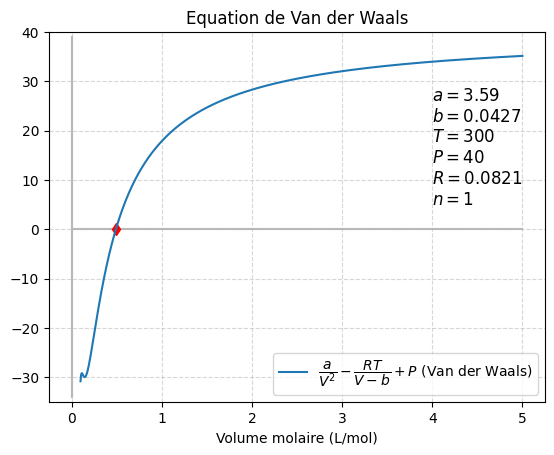

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 3.59 / x² - (0.0821 * 300) / (x - 0.0427) + 40

# Paramètres du problème : CO2 à 300K et 40 atm (bonbonne de gaz)
P = 40  # Pression en atm
T = 300  # Température en K
a = 3.59  # Constante de Van der Waals (atm L^2/mol^2)
b = 0.0427  # Constante de Van der Waals (L/mol)
R = 0.0821  # Constante des gaz parfaits (L atm/mol K)

# Fonction f(V) pour l'équation de Van der Waals
def f(V):
    return (a/V**2) - (R*T)/(V-b) + P

# Fonction f(V) pour un gaz parfait (pour comparaison)
def gp(V):
    return -(R*T)/V + P

V = np.linspace(0.1,5,1000)
Ve = 0.4918
# Représentation de la fonction
plt.plot([0, 5], [0, 0], c='0.72')
plt.plot([0, 0], [-34, 39], c='0.72')
plt.plot(Ve, 0, 'rd')
plt.plot(V, f(V), label=r'$\dfrac{a}{V^2}-\dfrac{RT}{V-b}+P$ (Van der Waals)')
#plt.plot(V, gp(V), label=r'$-\dfrac{RT}{V}+P$ (gaz parfait)')
plt.xlabel('Volume molaire (L/mol)')
plt.title(f"Equation de Van der Waals")
plt.ylim([-35, 40])
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.text(4, 5, f'${a=}$\n${b=}$\n${T=}$\n${P=}$\n${R=}$\n$n=1$', fontsize = 12)

plt.show()



### Définition du problème
Soit une fonction continue sur $f\colon [a, b] \to \R$. On aimerait trouver numériquement $\alpha \in [a, b]| f(\alpha) = 0$


<u>Remarques</u>

1. $\alpha$ est un zéro ou une racine de $f$
2. Nous cherchons en réalité une bonne approximation de $\alpha$

<u>idée</u>

A partir d'une première approximation, on construit une suite comvergente $\{x_{n}\}_{k=0}^{\infty}$ valeurs approchées de la racine recherchées que
$$\lim_{k \to \infty} x_{k} = \alpha$$

<u>Définition</u>

Cette suite est dite convergente d'ordre $p \geq 1$ si
$$\exists c, k_{0} > 0 | \forall k > k_{0} | x_{k+1} - \alpha | \leq c |x_{k} - \alpha|^{p}$$

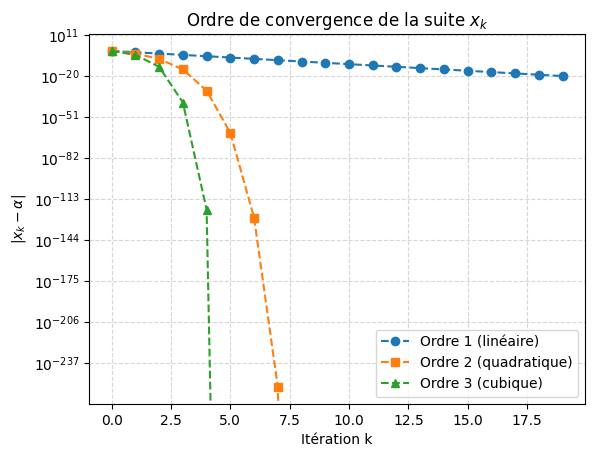

In [41]:
import numpy as np
import matplotlib.pyplot as plt

n_iter = 20

def gen_error_convergence(p, e0=1e-1):
    # on génère un tableau d'erreurs selon une convergence
    # d'ordre p
    errors = [e0]
    for _ in range(n_iter - 1):
        next_error = 0.1*errors[-1]**p  # on définit une convergence d'ordre p
        errors.append(next_error)
    return np.array(errors)

errors_p1 = gen_error_convergence(p=1.0)
errors_p2 = gen_error_convergence(p=2.0)
errors_p3 = gen_error_convergence(p=3.0)

k = np.arange(n_iter)
# On trace en semilogy (meilleure visualisation de l'erreur)
plt.semilogy(k, errors_p1, 'o--', label="Ordre 1 (linéaire)")
plt.semilogy(k, errors_p2, 's--', label="Ordre 2 (quadratique)")
plt.semilogy(k, errors_p3, '^--', label="Ordre 3 (cubique)")

plt.xlabel("Itération k")
plt.ylabel(r"$|x_k - \alpha|$")
plt.title("Ordre de convergence de la suite $x_k$")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()


<u>Remarque</u>

1. Si $p = 1$, on parle de convergence linéaire. Il faut alors que $c < 1$
2. Si $p = 2$, on parle de convergence quadratique.
2. Si $p = 3$, on parle de convergence cubique.
4. $p$ peut ne pas être un entier.
5. La convergence d'une suite dépend généralement de la valeur initiale $x_{0}$

<u>Définition</u>

La différence entre la solution exacte $x_{r}$ à l'itération $k$ représente l'erreur numérique absolue $e_{k}$
$$e_{\text{abs}, k} = |x_{k} - \alpha|$$
l'erreur relative vaut
$$e_{\text{rel}, k} = \frac{e_{\text{abs}, k}}{x_{k}} = \frac{|x_{k} - \alpha|}{x_{k}}$$

## Méthode de dichotomie
Soit $f\colon [a, b] \to \R$ une fonction continue. Alors cette fonction prend toutes les valeurs entre $\min_{x \in I} f(x)$ et $\max_{x \in I} f(x)$. C'est le théorème des valeurs intermédiares.


En particulier, si $f$ et $[a, b]$ sont tels que
$$f(a) \cdot f(b) < 0 \implies \exists \alpha \in (a, b) | f(\alpha) = 0$$

### Méthode de bissection
<!-- schéma -->
On construit la suite $\{x_{k}\}_{k}^{\infty} = 0$ qui converge vers $\alpha$ en se basant sur le théorème de Bolzan, en considérant un intervalle $[a_{R}, b_{R}]$ de plus en plus petit autour de la racine recherchée.


<u>Algorithme</u>

1. Choisir un intervalle de départ $[a, b]$ tel que la condition de Bolzano est satisfait.
$$f(a) \cdot f(b) < 0$$
2. Calculer le point milieu $x_{k} = \frac{b+a}{2}$ qui divise l'intervalle en deux.
3. Vérifier dans quel sous-intervalle la propriété de Bolzano est satisfaite. On a trois cas de figure:
    - si $f(x_{k}) = 0$, $x_{k}$ est la racine recherchée. De façon idéale, on commence par tester pour l'erreur que l'on s'autorise, cependant ne pas le faire rajoute au pire une itération, ce qui n'est pas dramatique.
    - si $f(a) \cdot f(x_{k}) < 0$, on pose $b = x_{k}$
    - si $f(b) \cdot f(x_{k}) < 0$, on pose $a = x_{k}$
    - On répète les étapes 2 et 3 tant que la condition d'arrêt n'est pas satisfaite. Celle-ci agit généralement sur l'erreur et/ou le nombre d'itérations maximal.

In [ ]:
"""
Cet algorithme est légèrement diffèrent de celui vu en cours.
Les changements sont les suivants :
    - On ne vérifie pas si kmax est atteint à chaque itération
    - On vérifie si la tolérance a été atteinte à la fin
    - Sinon, on préviens que kmax a été atteint
Cela permet de réduire légèrement la complexité temporelle de l'algorithme.
On a donc:
    - Complexité temporelle : O(log(b-a))
    - Complexité spatiale : O(1) (on ne garde pas les valeurs intermédiaires)
Plus exactement, en parant du principe que O(f(x)) = 1, on a:
    O(5 * log(b-a) + ) dans le pire cas ou lieu de O(6 * log(b-a)) dans le cas vu en cours.
"""

def bissection(f,a,b,tol,kmax):
    '''
    INPUT
        f :     fonction à étudier
        a :     borne inférieure de l'intervalle de départ
        b :     borne supérieure de l'intervalle de départ
        tol :   tolérance sur l'erreur
        kmax :  nombre maximal d'itérations maximal autorisé
        
    OUTPUT
        xbar :  valeur approchée du zero
        mil :   liste contenant les valeurs approchées x_k 
    '''
    mil = [] # On initialise la liste des valeurs testées
    if f(a)*f(b) >= 0 : # On vérifie la condition de Bolzano
        print("Mauvais choix d'intervalle")  # Il serait encore possible de lever une exception
        return
    else:
        while (b-a)/2 > tol and len(mil) < kmax: # on continue tant que l'on n'a pas atteint la tolérance ou le nombre d'itérations maximal
            m = (a+b)/2  # on calcule le milieu de l'intervalle
            mil.append(m)  # on ajoute la valeur testée à la liste
            if f(a)*f(m) < 0: # on vérifie le signe de f(a) et f(m)
                b = m  # on remplace b par m si f(a) et f(m) ont des signes opposés
            elif f(b)*f(m) < 0: # on vérifie le signe de f(b) et f(m)
                a = m  # on remplace a par m si f(b) et f(m) ont des signes opposés
            elif f(m) == 0: # on vérifie si f(m) est égal à 0
                print("Valeur exacte trouvée")
                return mil, m  # on retourne la liste des valeurs testées et la valeur exacte trouvée
        
        if (b-a)/2 <= tol:  # on vérifie si la tolérance a été atteinte
            print(f"le zéro a été approché de manière satisfaisante au bout de {len(mil)} itérations")
        else:
            print(f"le zéro n'a pas été approché de manière satisfaisante au bout de {kmax} itérations")
    return (a+b)/2, mil  # on retourne la valeur approchée du zéro et la liste des valeurs testées



In [43]:
a0 = 0.1
b0 = 5
tol = 1e-8
kmax = 100

out = bissection(f, a0, b0, tol, kmax)

print(out[0])
print(f"Ma méthode a convergé au bout de {len(out[1])} itérations")


le zéro a été approché de manière satisfaisante au bout de 28 itérations
0.4918026937171816
Ma méthode a convergé au bout de 28 itérations


<u>Remarques</u>

1. La converge de cette méthode est lente.
2. Cette méthode n'a pas d'ordre de convergence.
3. Si la fonction possède plusieurs racines dans l'intervalle considéré, alors on détermine des sous-intervalles intéressants (possèdant une seule racine) sur lesquels on appliaue la méthode de la bissection.
4. Cette méthode ne prends pas en compte la forme de la fonction, mais ne se base que sur les intervalles.

On peut donner une borne supérieure à l'erreur absolue.
$$\begin{aligned}
    e_{\text{abs}, k} =& |x_{k}-\alpha| < \frac{1}{2} | b_{k} - a_{k} | = \frac{1}{2} I_{k}\\
    <& \frac{1}{2} \cdot \left( \frac{1}{2} I_{k-1} \right) = \frac{1}{2} \cdot \frac{1}{2^{k}} I_{0}\\
    <&\frac{1}{2^{k+1}} | b_{0} - a_{0} |
\end{aligned}$$
Comme
$$\lim_{k \to \infty} e_{\text{abs}, k} = 0$$
la méthode converge à coup sûr. On impose généralement une tolérence $\varepsilon$ tel que l'algorithme termine lorsque
$$e_{\text{abs}, k} < \frac{|b-a|}{2^{k+1}} < \varepsilon$$
Le nombre minimal d'opération est tel que
$$\begin{aligned}
    &\frac{1}{2^{k+1}} |b-a | < \varepsilon\\
    \implies& 2^{k+1} > \frac{|b-a|}{\varepsilon}\\
    \implies& k_{\text{min}} = \log_{2}\left( \frac{|b-a|}{\varepsilon} \right) - 1
\end{aligned}$$



# ICS - Travaux Pratiques 10

07.05.25


<font color=grey>_Ce 10e TP se concentre sur les algorithmes permettant d'approximer les racines d'une fonction non linéaire en utilisant une approche dichotomique. Nous allons également étudier les différentes approximations possibles de la dérivée d'une fonction pour se préparer au cours de la semaine prochaine._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

## Exercice 0 : Echauffement

Soit la fonction réelle d'une variable réelle $g:\mathcal{R}\rightarrow\mathcal{R}$ définie par 

$$
g(x) = x^3 sin(\pi x)\,.
$$

On cherche à étudier la fonction $g$ en la représentant graphiquement et en déterminant en particulier le nombre de ses zéros dans un intervalle donné. Pour ce faire, il vous est demandé

1. d'implémenter une fonction Python `representation_graphique` admettant pour arguments :
  * une fonction `f` ;
  * deux nombres `a` et `b`, avec $b>a$, qui précisent, en abscisse, l'intervalle sur lequel la fonction doit être représentée ; 
  * le nombre `N` de points $(x,f(x))$ à considérer dans la représentation ;
  * le `titre` de la représentation ;

  Cette fonction doit produire une sauvegarde `FigureTP10ICS.pdf` de la figure au format pdf et doit afficher la figure dans le Jupyter Notebook ;

2. de définir en Python la fonction $g(x)$ définie ci-dessus ;
3. d'appeler la fonction `representation_graphique` de manière à représenter la fonction $g(x)$ dans l'intervalle $[-2.2,2.2]$ en utilisant $100$ points et en lui donnant pour titre "Représentation graphique de $g(x)$" ;
4. de déterminer visuellement le nombre de zéros dans l'intervalle considéré.

#### <font color=grey>Solution </font>

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from numbers import Number
from collections.abc import Callable

# 1. Solution du point 1
def representation_graphique(f: Callable, a: Number, b: Number, N: int, title: str) -> None:
    """
    Représente la fonction f sur l'intervalle [a, b] avec N points.
    :param f: La fonction à représenter.
    :param a: Le début de l'intervalle.
    :param b: La fin de l'intervalle.
    :param N: Le nombre de points à utiliser pour la représentation.
    :param title: Le titre du graphique.
    """

    x = np.linspace(a, b + ((b-a)/(N-1)), N)
    y = f(x)
    plt.plot(x, y, label=title)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid()
    plt.legend()
    plt.savefig(f"graph_{title}.pdf")
    plt.show()

In [3]:
# 2. Solution du point 2
g = lambda x: x**3 * np.sin(np.pi * x)

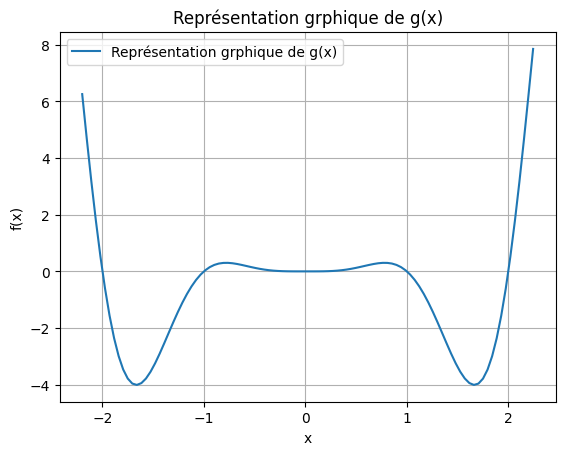

In [9]:
# 3. Solution du point 3
representation_graphique(g, -2.2, 2.2, 100, "Représentation grphique de g(x)")

***

## Exercice 1 : Méthode de bissection

Soit la fonction réelle d'une variable réelle $g(x)$ définie ci-dessus à l'`exercice 0`.

Il vous est demandé$\ldots$
1. en utilisant le **théorème de Bolzano**, de montrer que la fonction $g$ admet (au moins) un zéro dans l'intervalle $]-\frac{5}{2},-\frac{1}{2}[$.
2. en implémentant l'algorithme correspondant à la **méthode de la bissection simple**, de trouver un zéro de $g$ appartenant à l'intervalle $]-\frac{5}{2},-\frac{1}{2}[$ avec une **erreur (tolérance) inférieure à $10^{−8}$**.<br>
Construisez pour ce faire une fonction `resoudre_par_bissection_simple` ayant pour arguments :
    - la fonction `f` pour laquelle on veut trouver un zéro ;
    - les extrémités `a` et `b` de l'intervalle considéré ($a<b$) ;
    - la tolérance `tol` désirée.

   Cette fonction doit s'assurer que la condition de Bolzano est bien vérifiée pour l'intervalle demandé (et afficher un message d'erreur si ce n'est pas le cas) et doit retourner :
    - un nombre correspondant...
        * ... soit au point milieu du dernier intervalle considéré par la méthode,
        * ... soit au point milieu $m_k = (a_k + b_k)/2$ d'un intervalle vérifiant $f(m_k)=0$ (solution exacte),

   - ainsi qu'un nombre correspondant au nombre $k\ge 0$ d'itérations effectuées.

3. Au bout de combien d'itérations atteint-on la tolérance demandée? Montrez le résultat (i) théoriquement et (ii) numériquement.

4. Modifier votre fonction pour qu'elle retourne :
    - les solutions approximées $x_k$ à chaque itération de la méthode
    - la borne inférieure de l'intervalle à chaque itération $a_k$
    - la borne supérieure de l'intervalle à chaque itération $b_k$

5. La solution exacte de cette équation dans l'intervalle considéré vaut $\alpha=-1$. Représentez graphiquement l'évolution de l'erreur maximale entre la solution exacte et les bornes supérieures et inférieures des intervalles considérés max($\alpha-a_k, \alpha-b_k$) en fonction du nombre d'itérations. Représentez sur le même graphe l'erreur absolue pour chaque itération.


#### <font color=grey>Solution </font>

In [115]:
# 1. Solution du point 1
print(f"g(-2) = {g(-2)}, g(-0.5) = {g(-1/2)}")

g(-2) = -1.959434878635765e-15, g(-0.5) = 0.125


In [107]:
bolz = lambda f, a, b : bool(f(a) * f(b) < 0)

f = lambda x: x**3 * np.sin(np.pi * x) - 0.5
a = -2
b = -1/5
print(bolz(f, a, b))

False


In [119]:
# 2. Solution du point 2
def resoudre_par_bissection_simple(f: Callable, a: Number, b: Number, tol: float|np.float64, N: int) -> float|np.float64:
    """
    Résout l'équation f(x) = 0 sur l'intervalle [a, b] par la méthode de bissection simple.
    :param f: La fonction à résoudre.
    :param a: Le début de l'intervalle.
    :param b: La fin de l'intervalle.
    :param tol: La tolérance pour la convergence.
    :param N: Le nombre maximum d'itérations.
    :return: La solution approchée x.
    """
    if bolz(f,a,b):
        for i in range(N):
            x = (a+b) / 2
            if abs(f(x)) < tol:
                return x
            if f(a) * f(x) < 0:
                b = x
            else:
                a = x
        return (a+b) / 2
    raise ValueError("La fonction doit changer de signe sur l'intervalle [a, b].")



resoudre_par_bissection_simple(g, 2.5, -1/2, 1e-8, 100)

ValueError: La fonction doit changer de signe sur l'intervalle [a, b].

In [ ]:
# 3. Solution du point 3
def resoudre_par_bissection_simple_2(f: Callable, a: Number, b: Number, tol: float|np.float64, N: int) -> int:
    """
    Résout l'équation f(x) = 0 sur l'intervalle [a, b] par la méthode de bissection simple.
    :param f: La fonction à résoudre.
    :param a: Le début de l'intervalle.
    :param b: La fin de l'intervalle.
    :param tol: La tolérance pour la convergence.
    :param N: Le nombre maximum d'itérations.
    :return: La solution approchée x.
    """
    if bolz(f,a,b):
        i:int = 0
        for i in range(N):
            i = i + 1
            x:Number = (a+b) / 2
            if abs(f(x)) < tol:
                return i
            if f(a) * f(x) < 0:
                b = x
            else:
                a = x
        return (a+b) / 2
    raise ValueError("La fonction doit changer de signe sur l'intervalle [a, b].")

resoudre_par_bissection_simple_2(g, -2, -1/2, 1e-8, 100)

28

In [4]:
# 4. Solution du point 4
import numpy as np 
import matplotlib.pyplot as plt
from numbers import Number
from collections.abc import Callable
import warnings
class Table:
    """
    Classe pour représenter un tableau de valeurs.
    """
    def __init__(self, *args: list[str]):
        """
        Initialise le tableau avec les en-têtes fournies.
        :param args: En-têtes du tableau.
        """
        self.headers = args
        self.data = {header: [] for header in args}

    def __add__(self, other: 'Table') -> 'Table':
        """
        Additionne deux tableaux.
        :param other: Autre tableau à additionner.
        :return: Un nouveau tableau résultant de l'addition.
        """
        if len(self.headers) != len(other.headers):
            raise ValueError("Les tableaux doivent avoir le même nombre d'en-têtes.")
        new_table = Table(*self.headers)
        for header in self.headers:
            new_table.data[header] = [a + b for a, b in zip(self.data[header], other.data[header])]
        return new_table

    def __str__(self) -> str:
        """
        Représente le tableau sous forme de chaîne de caractères.
        :return: Représentation du tableau.
        """
        header_str = "\t | \t".join(self.headers)
        rows_str = "\n".join("\t | \t".join(map(str, row)) for row in zip(*self.data.values()))
        return f"{header_str}\n{rows_str}"

    def add_row(self, *args: list[any]):
        """
        Ajoute une ligne de données au tableau.
        :param args: Valeurs à ajouter.
        """
        if len(args) > len(self.headers):
            raise ValueError("Le nombre de valeurs ne peut être suppérieur au nombre d'en-têtes.")
        if len(args) < len(self.headers):
            warnings.warn("Le nombre de valeurs est inférieur au nombre d'en-têtes.")
        for header, value in zip(self.headers, args):
            self.data[header].append(value)

    def __getitem__(self, key: str) -> list[any]:
        """
        Accède à une colonne du tableau.
        :param key: Nom de la colonne.
        :return: Liste des valeurs de la colonne.
        """
        if key not in self.headers:
            raise KeyError(f"La colonne '{key}' n'existe pas.")
        return self.data[key]

def resoudre_par_bissection_simple_3(f: Callable, a: Number, b: Number, tol: float|np.float64, N: int) -> int:
    """
    Résout l'équation f(x) = 0 sur l'intervalle [a, b] par la méthode de bissection simple.
    :param f: La fonction à résoudre.
    :param a: Le début de l'intervalle.
    :param b: La fin de l'intervalle.
    :param tol: La tolérance pour la convergence.
    :param N: Le nombre maximum d'itérations.
    :return: La solution approchée x.
    """
    if f(a) * f(b) < 0:
        table: Table = Table("i", "a", "b", "x")
        i:int = 0
        for i in range(N):
            i = i + 1
            x:Number = (a+b) / 2
            table.add_row(i, a, b, x)
            if abs(f(x)) < tol:
                return table
            if f(a) * f(x) < 0:
                b = x
            else:
                a = x
        return (a+b) / 2
    raise ValueError("La fonction doit changer de signe sur l'intervalle [a, b].")

print(resoudre_par_bissection_simple_3(g, -2, -1/2, 1e-8, 100))

i	 | 	a	 | 	b	 | 	x
1	 | 	-2	 | 	-0.5	 | 	-1.25
2	 | 	-1.25	 | 	-0.5	 | 	-0.875
3	 | 	-1.25	 | 	-0.875	 | 	-1.0625
4	 | 	-1.0625	 | 	-0.875	 | 	-0.96875
5	 | 	-1.0625	 | 	-0.96875	 | 	-1.015625
6	 | 	-1.015625	 | 	-0.96875	 | 	-0.9921875
7	 | 	-1.015625	 | 	-0.9921875	 | 	-1.00390625
8	 | 	-1.00390625	 | 	-0.9921875	 | 	-0.998046875
9	 | 	-1.00390625	 | 	-0.998046875	 | 	-1.0009765625
10	 | 	-1.0009765625	 | 	-0.998046875	 | 	-0.99951171875
11	 | 	-1.0009765625	 | 	-0.99951171875	 | 	-1.000244140625
12	 | 	-1.000244140625	 | 	-0.99951171875	 | 	-0.9998779296875
13	 | 	-1.000244140625	 | 	-0.9998779296875	 | 	-1.00006103515625
14	 | 	-1.00006103515625	 | 	-0.9998779296875	 | 	-0.999969482421875
15	 | 	-1.00006103515625	 | 	-0.999969482421875	 | 	-1.0000152587890625
16	 | 	-1.0000152587890625	 | 	-0.999969482421875	 | 	-0.9999923706054688
17	 | 	-1.0000152587890625	 | 	-0.9999923706054688	 | 	-1.0000038146972656
18	 | 	-1.0000038146972656	 | 	-0.9999923706054688	 | 	-0.9999980926513672
1

In [111]:
# 5. Solution du point 5


***

## Exercice 2 : Bissection par intervalles

Dans cet exercice, il vous est demandé d'utiliser la **méthode de la bissection par intervalles** pour déterminer une valeur approchée de **tous les zéros** dans l'intervalle $[-2.2,2.2]$ de la fonction 
$$
g(x) = x^3 sin(\pi x)
$$

déjà étudiée dans l'exercice précédent, l'**erreur commise** devant être inférieure à $10^{-8}$. Plus précisément, il vous est proposé de construire une nouvelle fonction `resoudre_par_bissection` qui fera appel à la fonction `resoudre_par_bissection_simple` définie dans la série précédente pour déterminer les zéros de $g$. Cette fonction devra admettre comme paramètres : 
* `f` : la fonction pour laquelle nous cherchons à trouver $\alpha$ tel que $f(\alpha)=0$ ;
* `a` et `b` : deux nombres qui correspondent aux bornes de l'intervalle initial de recherche ; 
* `step` : la longueur de chacun des intervalles considérés dans la méthode `resoudre_par_bissection_simple`;
* `tol` : nombre réel positif donnant la tolérance à atteindre.

La fonction doit retourner une liste `zeros` renfermant le(s) zéro(s).


Une représentation graphique de la fonction et des zéros trouvés vous permettra de vérifier votre implémentation.

Remarquons que les sous-intervalles peuvent être définis à l'aide d'un tableau (ndarray) de `numpy`, et qu'il faut être particulièrement vigilant dans le choix du nombre de sous-intervalles de manière à éviter la "perte" de certains zéros.

#### <font color=grey>Solution </font>

In [143]:
def resoudre_par_bissection(f: Callable, a: Number, b: Number, step: float, tol: float|np.float64, N: int = 100) -> list[Number]:
    """
    Résout l'équation f(x) = 0 sur l'intervalle [a, b] par la méthode de bissection.
    :param f: la fonction à résoudre.
    :param a: le début de l'intervalle.
    :param b: la fin de l'intervalle.
    :param step: le pas de la méthode de bissection.
    :param tol: la tolérance pour la convergence.
    :return: la solution approchée x.
    """
    zeros = []
    if abs(f(a)) < tol:
        zeros.append(float("{:.8f}".format(a)))
    for i in range(int(np.ceil((b-a)/step))):
        inf = a + step * i
        sup = a + step * (i+1)
        if sup > b:
            sup = b
        if abs(f(sup)) < tol:
            if len(zeros) == 0:
                zeros.append(float("{:.8f}".format(sup)))
            elif abs(sup - zeros[-1]) > tol:
                zeros.append(float("{:.8f}".format(sup)))
        try:
            zero = resoudre_par_bissection_simple(f, inf, sup, tol, N = 100)
            if len(zeros) == 0:
                zeros.append(float("{:.8f}".format(zero)))
            elif abs(zero - zeros[-1]) > tol:
                zeros.append(float("{:.8f}".format(zero)))
        except ValueError:
            continue
    return zeros


print(resoudre_par_bissection(g, -2, 2, 3, 1e-8))
# for i in range(1, 10):
#     for j in range(-22, 22, 4):
#         for k in range(-22, 22, 4):
#             if j == k:
#                 continue
#             else:
#                 zeros = resoudre_par_bissection(g, j/10, k/10, i/10, 1e-8)
#                 if len(zeros) > 0:
#                     print(f"Pour l'intervalle [{j/10}, {k/10}] avec un pas de {i/10} : la résolution de l'équation f(x) = 0 est {zeros}")
#                 else:
#                     print(f"Pour l'intervalle [{j/10}, {k/10}] avec un pas de {i/10} : aucune solution trouvée")
#                     break


[-2.0, 1.0, -1.0, 2.0, 1.0]


***

## Exercice 3 : Méthode des parties proportionnelles (exercice avancé)

<font color=grey>**Préambule** 

Le fonctionnement de la méthode des parties proportionnelles est extrêmement similaire à celui de la méthode par bissection. 

Au lieu de définir le point $x_{k+1}$ comme le milieu de l'intervalle $[a,b]$, celui-ci est défini comme l'intersection entre l'axe des abcisses et la droite reliant les point $(a, f(a))$ et $(b, f(b))$, comme indiqué sur le schéma ci-dessous.</font>

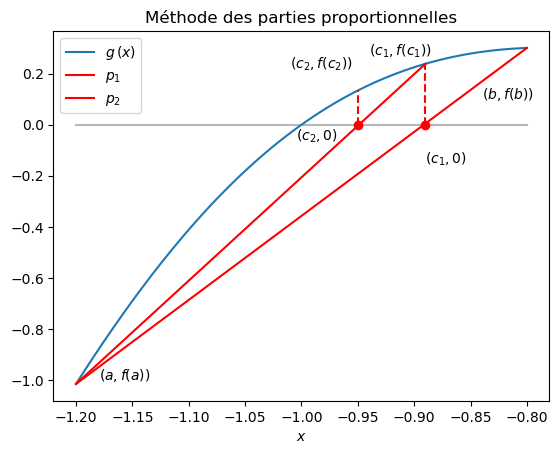

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

def g(x):
    return pow(x,3)*np.sin(np.pi*x)

x = np.linspace(-1.2,-0.8,100)
y = g(x)
plt.plot([x[0],x[-1]], [0,0], c='0.72') # on trace l'axe des x (correspondant à y=0)
#plt.plot([-1.2,-1.2], [y.min(),y.max()], c='0.72') # on utilise les valeurs min et max du tableau y
plt.plot(x,y,label='$g\,(x)$')
plt.plot([x[0],x[-1]],[y[0],y[-1]],'-r', label='$p_1$')
plt.plot([x[0],-0.89],[y[0],g(-0.89)],'-r', label='$p_2$')
plt.plot([-0.89,-0.89], [0, g(-0.89)],'--r')
plt.plot([-0.95,-0.95], [0, g(-0.95)],'--r')
plt.plot(-0.89,0,'ro')
plt.plot(-0.95,0,'ro')
plt.title("Méthode des parties proportionnelles")
plt.xlabel('$x$')
plt.text(-0.89,-0.15,"$(c_1, 0)$")
plt.text(-0.94,0.27,"$(c_1, f(c_1))$")
plt.text(-1.005,-0.06,"$(c_2, 0)$")
plt.text(-1.01,0.22,"$(c_2, f(c_2))$")
plt.text(-1.18,-1.0,"$(a, f(a))$")
plt.text(-0.84,0.1,"$(b, f(b))$")
plt.legend(loc='upper left')
plt.savefig('FigureICS.pdf')
plt.show()

Dans cet exercice, il vous est demandé de déterminer une valeur approchée **du zéro** de la fonction $g(x) = x^3 sin(\pi x)$ étudiée lors de l'exercice 1, dans l'intervalle $]-1.2,-0.8[$ en implémentant cette fois l'algorithme correspondant à la **méthode des parties proportionnelles**. 

1. Déterminez analytiquement l'expression du point $c$ défini précédemment comme l'intersection entre la droite reliant les points $(a, f(a))$ et $(b, f(b))$ et l'axe $y=0$.

2. Implémentez une fonction `resoudre_par_pp` correspondant à la méthode de recherche des zéros par parties proportionnelles. Cette fonction devra admettre en arguments :
    * la fonction `f` pour laquelle nous cherchons à trouver une solution approchée ;
    * les nombres `a` et `b` correspondant aux bornes de l'intervalle initial de recherche ;
    * la tolérance `tol` à atteindre (en abscisse, entre deux éléments successifs) ;
    * le nombre maximal `k_max` d'itérations à effectuer .

    Cette fonction devra retourner la valeur approchée du zéro de $f$ ainsi qu'une liste contenant la valeur $x_k$ obtenue à chaque itération.

3. Vérifiez votre implémentation en considérant une tolérance de $10^{−8}$ et en observant le nombre d'itérations nécessaires.

#### <font color=grey>Solution </font>

1. On cherche l'intersection $c$ des deux droites $y = mx + h$ et $y = 0$. Commençons par trouver la valeur du paramètre $m$.
    - La pente d'une droite est définie comme
    $$m := \frac{\Delta y}{\Delta x} = \frac{f(b) - f(a)}{b - a}$$
    Une fois le paramètre $m$ trouvé, on peut chercher le paramètre $h$.
    - La hauteur $h$ correspond au déplacement vertical de la droite.
    $$\begin{aligned}
            & y = mx + h\\
            & y(a) = f(a) = ma + h\\
        \iff& f(a) = \frac{f(b) - f(a)}{b - a} a + h\\
        \iff& f(a) = \frac{a f(b) - a f(a)}{b - a} + h\\
        \iff& h = f(a) - \frac{a f(b) - a f(a)}{b - a}\\
        \iff& h = \frac{f(a)(b - a) - (a f(b) - a f(a))}{b - a}\\
        \iff& h = \frac{b f(a) - a f(a) - a f(b) + a f(a)}{b - a}\\
        \iff& h := \frac{b f(a) - a f(a)}{b - a}
    \end{aligned}$$
    L'intersection a donc lieu a l'abscisse:
    $$\begin{aligned}
            & y = mx + h\\
        \iff& 0 = \frac{f(b) - f(a)}{b - a} x + \frac{b f(a) - a f(b)}{b - a}\\
        \iff& \frac{a f(b) - b f(a)}{b - a} = \frac{f(b) - f(a)}{b - a} x\\
        \iff& \frac{\frac{a f(b) - b f(a)}{b - a}}{\frac{f(b) - f(a)}{b - a}} = x\\
        \iff& x = \frac{a f(b) - b f(a)}{f(b) - f(a)}
    \end{aligned}$$
    Le point c a donc comme coordonnée:
    $$c = \left( \frac{a f(b) - b f(a)}{f(b) - f(a)}, 0 \right)

In [69]:
# Solution du point 2

In [ ]:
# Solution du point 3


***

## Exercice 4 : Dérivée première d'une fonction 


<font color=grey>**Préambule**

Soit $f:[a,b]\rightarrow \mathcal{R}$ une fonction continûment dérivable dans $[a,b]$, on peut envisager essentiellement trois méthodes (ou schémas) pour approximer la dérivée de $f$ (c'est-à-dire le taux de variation de $f$) en un point $p$ de $]a,b[$. En effet, la définition de la dérivée d'une fonction $f$ suggère qu'une bonne approximation numérique est certainement donnée par
$$
f_{prime,d}(p)=\dfrac{f(p+h)-f(p)}{h}\,,
$$
pour autant que $h$ soit un nombre positif et suffisamment petit.
On appelle cette quantité la **différence finie à droite**. On pourrait également envisager considérer...:
* la **différence finie à gauche**
$$
f_{prime,g}(p)=\dfrac{f(p)-f(p-h)}{h}\,;
$$
* ou la **différence finie centrée** (moyenne des deux autres différences)
$$
f_{prime,c}(p)=\dfrac{f(p+h)-f(p-h)}{2h}\,.
$$</font>

Dans cet exercice, il vous est demandé d'écrire une fonction `derivee` qui admet pour arguments une fonction `f`, un nombre `p`, un schéma `schema` et un nombre `h`. Les deux derniers arguments devront être facultatifs, leur valeur par défaut étant, respectivement, `centree` et `0.1`. La fonction `derivee` devra retourner un nombre correspondant à l'approximation de la dérivée $f'$ de $f$ évaluée en $p$, obtenue à l'aide de la méthode choisie qui pourra être `droite`, `gauche` ou `centree`. La méthode devra retourner un message d'erreur si la méthode passée en arguments n'est pas une des trois méthodes implémentées.

Vérifiez votre travail en représentant la fonction $f(x)=\cos{x}$ au voisinage de $x=0$ et en calculant le nombre dérivé de $f$ en $x=0$ à l'aide des trois schémas proposés. Que pouvez-vous dire de la précision de ces trois schémas ?  
Représentez également sur une même figure la fonction $f(x)=\cos{x}$, la fonction dérivée $f'(x)$ (calculée analytiquement), ainsi que la fonction $f_{prime,c}(x)$. Considérez pour ce faire l'intervalle $[-1,1]$ en abscisse.

#### <font color=grey>Solution </font>

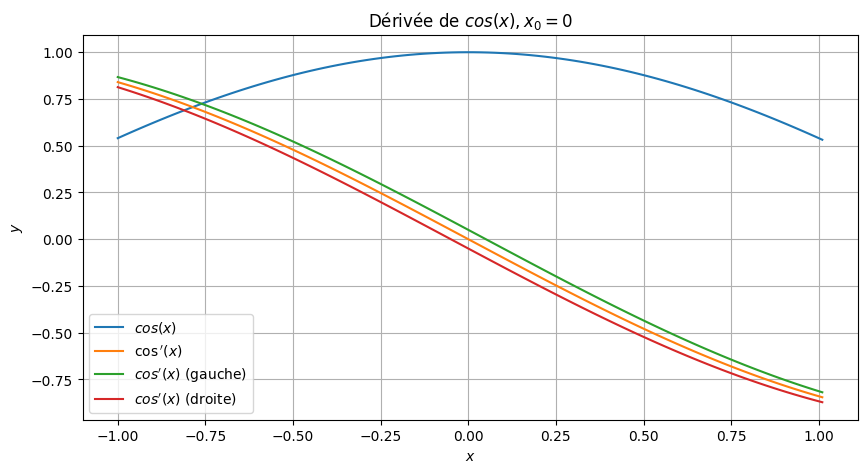

In [27]:
def derivee(f: Callable, p: Number, schema: str = 'centre', h: float|np.float64 = 0.1) -> float|np.float64:
    """
    Calcule la dérivée de la fonction f en p selon le schéma spécifié.
    :param f: La fonction à dériver.
    :param p: Le point où calculer la dérivée.
    :param schema: Le schéma de dérivation ('gauche', 'centre', 'droite').
    :param h: Le pas pour le calcul de la dérivée.
    :return: La valeur de la dérivée en p.
    """
    if schema == 'droite':
        return (f(p + h) - f(p)) / h
    elif schema == 'gauche':
        return (f(p) - f(p - h)) / h
    elif schema == 'centre':
        return (f(p + h) - f(p - h)) / (2 * h)
    else:
        raise ValueError("Schéma non reconnu. Utilisez 'gauche', 'centre' ou 'droite'.")


x = np.linspace(-1, 1+0.01, 100)

plt.figure(figsize=(10, 5))
plt.plot(x, np.cos(x), label=r'$cos(x)$')
plt.plot(x, derivee(np.cos, x), label=r"$\cos'(x)$")
plt.plot(x, derivee(np.cos, x, 'gauche'), label=r"$cos'(x)$ (gauche)")
plt.plot(x, derivee(np.cos, x, 'droite'), label=r"$cos'(x)$ (droite)")
plt.title(r"Dérivée de $cos(x), x_{0} = 0$")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.legend()
plt.show()
